In [37]:
import json
import os

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Dunning kruger effect


In [38]:
history = [{'human': "Hi i'm THOMAS !! :DD", 'AI': '{\n"expected": "Deep learning is a subset of machine learning, which is a type of artificial intelligence that focuses on algorithms that allow computers to learn from and make decisions or predictions based on data.",\n"confidence": 5,\n"tone": "Unassuming",\n"question": "That\'s a good start! Can you explain how deep learning differs from traditional machine learning techniques and what types of problems it is particularly well-suited for?"}'}, {'human': 'machine learning is old and dead. deep elarning is the new thing around the bloc !', 'AI': '{"expected": "While it\'s true that deep learning has gained popularity in recent years and has been able to achieve impressive results in certain applications, it\'s important to note that machine learning is still a very active field of research and has many applications beyond what deep learning can currently handle.",\n"confidence": 4,\n"tone": "Concerned",\n"question": "Can you give an example of a problem that deep learning is particularly well-suited for and explain why it is a good fit for that problem?"}'}, {'human': "it's best to solve all of your issues !!!", 'AI': '{"expected": "It is not always possible or necessary to use deep learning to solve every problem. Deep learning is a powerful tool, but it has its limitations and may not be the most appropriate approach for every problem. Sometimes simpler machine learning techniques or even traditional statistical methods may be more appropriate.",\n"confidence": 7,\n"tone": "Assertive",\n"question": "Can you think of a situation where deep learning may not be the best approach and explain why?"}'}, {'human': "Yes. For instance if you have seldom data, deep learning might not be the best tool to learn the corpus because it's data hungry.", 'AI': '{"expected": "Exactly! Deep learning models typically require large amounts of data to train effectively, and may not perform well when trained on small datasets. In these cases, simpler machine learning techniques or traditional statistical methods may be more appropriate. Can you give another example of a situation where deep learning may not be the best approach?",\n"confidence": 9,\n"tone": "Confident",\n"question": "Great job! Can you explain the basic architecture of a deep learning model and how it differs from a traditional machine learning model?"}'}, {'human': 'the basic architecture take an input as a vector, transform it linearly with a matrix multiplication, then performs an activation function on every node output of the layers.', 'AI': '{"expected": "That\'s correct! A deep learning model typically consists of one or more layers of artificial neural networks. Each layer takes an input vector, applies a linear transformation using a matrix multiplication, and then applies a non-linear activation function to the output. This process is repeated for each layer in the model. The key difference between deep learning models and traditional machine learning models is that deep learning models have multiple layers, allowing them to learn complex representations of the data.",\n"confidence": 10,\n"tone": "Formal",\n"question": "Great job! Can you explain one of the most commonly used activation functions in deep learning and why it is useful?"}'}, {'human': "Relu : max(0,x). It's really useful because the non linearity induced wich is not bounded works really well with modern models.", 'AI': '{"expected": "Yes, that\'s correct! The rectified linear unit (ReLU) is a commonly used activation function in deep learning. It is defined as max(0, x), meaning that it outputs the input if it is positive and 0 otherwise. The ReLU is a simple but effective activation function that has been shown to work well in many deep learning models. The main advantage of the ReLU over other activation functions is that it is not bounded, allowing for the efficient training of deep models. Can you explain another commonly used activation function and in what types of layers it is typically used?",\n"confidence": 10,\n"tone": "Confident",\n"question": "Great job! Can you explain the difference between a fully connected layer and a convolutional layer in a deep learning model?"}'}]

In [39]:
history

[{'human': "Hi i'm THOMAS !! :DD",
  'AI': '{\n"expected": "Deep learning is a subset of machine learning, which is a type of artificial intelligence that focuses on algorithms that allow computers to learn from and make decisions or predictions based on data.",\n"confidence": 5,\n"tone": "Unassuming",\n"question": "That\'s a good start! Can you explain how deep learning differs from traditional machine learning techniques and what types of problems it is particularly well-suited for?"}'},
 {'human': 'machine learning is old and dead. deep elarning is the new thing around the bloc !',
  'AI': '{"expected": "While it\'s true that deep learning has gained popularity in recent years and has been able to achieve impressive results in certain applications, it\'s important to note that machine learning is still a very active field of research and has many applications beyond what deep learning can currently handle.",\n"confidence": 4,\n"tone": "Concerned",\n"question": "Can you give an examp

In [40]:
import json
import os
import re

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

def get_similarity_rating(human_msg, ai_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating on a scale from 0 to 10 the similarity in meaning of the two sentences that i am going to give you. Your aim is only to output a number between 0 and 10.
    INSTRUCTIONS: You will output the rating in the following pattern: "0-10".
    
    EXAMPLE:
        user_input: Sentence 1): i like apples ; Sentence 2): the sky is blue
        ideal_output: 0
    IMPORTANT: The output must be a number between 0 and 10 in the pattern "0". IF YOU START THE MESSAGE WITH ANYTHING ELSE THAN NUMBERS, YOU WILL BE KILLED.'''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
    )
    msg = chat_completion.choices[0].message.content
    def is_number_with_newline(input_string):
        return bool(re.match(r'^\d', input_string))

    if not is_number_with_newline(msg):
        print(msg)
        chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg + " JUST OUTPUT THE NUMBER :"
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
        )
        msg = chat_completion.choices[0].message.content
        print(msg)

    return int(msg)


In [42]:




def plot_DK_curve(history):
    # Define the points
    x_points = np.array([0, 2, 3.5, 10])
    y_points = np.array([0, 8, 4, 10])

    # Create a cubic spline interpolation
    cspl = CubicSpline(x_points, y_points, bc_type='clamped')

    # Generate x values for the full range
    x = np.linspace(0, 10, 500)
    y = cspl(x)

    # Ensure the y values stay within the range [0, 10]

    dk_dict = {"rating": [], "confidence": []}
    for i in range(len(history)-1):
        human_msg = history[i+1]['human']
        ai_msg = json.loads(history[i]['AI'])["expected"]
        rating = get_similarity_rating(human_msg, ai_msg)
        dk_dict['rating'].append(int(rating))
        confidence = json.loads(history[i+1]['AI'])["confidence"]
        dk_dict['confidence'].append(int(confidence))

    dk_dict['confidence'] = np.array(dk_dict['confidence'])
    dk_dict['rating'] = np.array(dk_dict['rating'])
    threshold = 2.0  # Define a threshold for how far points can be from the curve
    curve_confidences = cspl(dk_dict['rating'])
    deltas = np.abs(dk_dict['confidence'] - curve_confidences)

    # Adjust confidences
    dk_dict['confidence'] = np.where(deltas > threshold, curve_confidences + np.sign(dk_dict['confidence'] - curve_confidences) * threshold, dk_dict['confidence'])


    # Plotting
    plt.figure(figsize=(10, 6),facecolor='gray')
    plt.plot(dk_dict['rating'], dk_dict['confidence'], 'o', color='orange', markersize=20, alpha=0.4)
    plt.plot(x, y, '--',color='white',linewidth=3)



    # Customizing the plot
    plt.gca().set_facecolor('gray')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['left'].set_color('white')
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')
    plt.gca().xaxis.label.set_color('white')
    plt.gca().xaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_color('white')
    plt.gca().title.set_color('darkgray')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Knowledge', weight='bold')
    plt.ylabel('Confidence', weight='bold')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig('./DK_curve.png', facecolor='darkgray')

 

plot_DK_curve(history)
    

NameError: name 'confidences' is not defined

In [9]:
say yes or no if its over 5 and then coller la courbe avec perturbations

SyntaxError: expected 'else' after 'if' expression (3402448548.py, line 1)

# plotting confidence over time


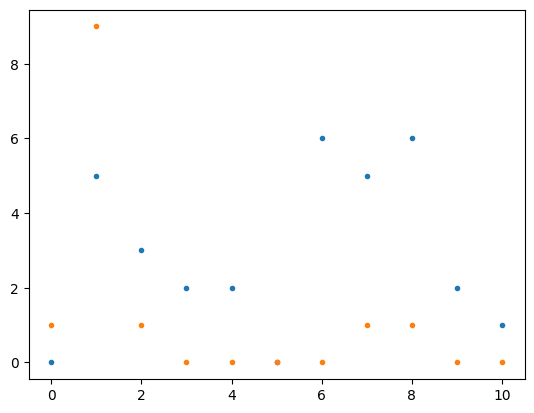

In [32]:
def retrieve_confidence(history):
    confidence = []
    for i in range(len(history)):
        confidence.append(int(json.loads(history[i]['AI'])["confidence"]))
    return confidence
plt.plot(retrieve_confidence(history),'.')

def retrieve_rating(history):
    rating = []
    for i in range(len(history)):
        rating.append(get_similarity_rating(history[i]['human'], json.loads(history[i]['AI'])["expected"]))
    return rating
plt.plot(retrieve_rating(history),'.')

# comment on style and delivery


In [36]:
# gather every deliveries that the user did and concatenate the into a single string
deliveries = []
for i in range(len(history)):
    deliveries.append(history[i]['human'])
deliveries = ' ;'.join(deliveries)

# ask the model to generate a feedback based on the deliveries

def get_similarity_rating(human_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating the quality of delivery and fiving one pointer to bring the delivery to the best delivery possible to the intented and very knowledgeable audience.
    
    EXAMPLE:
        user_input: i like innputs and girls, but i prefer blokes.
        output : Main point: your message is not clear you should refine the main message that you want to convey. 

        The output MUST be a SINGLE sentence.'''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": human_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=2*128,
    )

    return chat_completion.choices[0].message.content

get_similarity_rating(deliveries)

'Main point: Clarify your preference for "blokes" by explicitly contrasting it with your stated likes of "inputs" and "girls" for improved clarity to your knowledgeable audience.'

In [10]:
deliveries

NameError: name 'deliveries' is not defined

In [11]:
{
    "confidence": 2,
    "tone": "Unassuming",
    "feedback": "Nice to meet you, Thomas! Let's start with a simple SQL query. What is the syntax for selecting all columns and rows from a table called 'employees'?",
    "follow_up_question": "Now, Thomas, can you write a query that retrieves only the 'first_name' and 'salary' columns from the 'employees' table?",
    "expected_output": "The output should be a SELECT statement, retrieving 'first\_name' and 'salary' columns from the 'employees' table."
}["confidence"]

2